# Working with Seaborn

[Working with seaborn assignment](https://jswelling.github.io/CMU-MS-DAS-Vis-S25/assignment_seaborn.html)


In [1]:
import pandas as pd
import seaborn as sns

PATH_TO_CALIFORNIA_COUNTIES_DATA = "../data/california_counties.tsv"
PATH_TO_COVID_OFFSETS_DATA = "../data/covid_surge_offsets.tsv"

california_counties_df = pd.read_csv(
    PATH_TO_CALIFORNIA_COUNTIES_DATA, delimiter="\t"
)

covid_offsets_df = pd.read_csv(PATH_TO_COVID_OFFSETS_DATA, delimiter="\t")

In [2]:
# merge the two datasets
california_covid_merged_df = pd.merge(
    left=covid_offsets_df,
    right=california_counties_df,
    left_on="area",
    right_on="name"
)

# divide the population of each county by area in sq miles
california_covid_merged_df["population_density"] = california_covid_merged_df["population_2020"] / \
    california_covid_merged_df["area_sq_miles"]

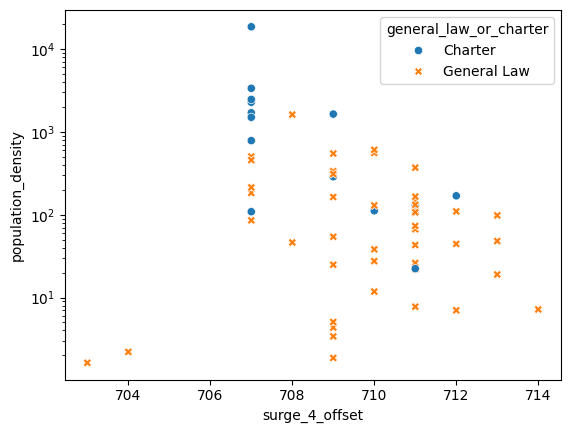

In [3]:
# create seaborn scatterplot

sns.scatterplot(data=california_covid_merged_df,
                x="surge_4_offset",
                y="population_density",
                style="general_law_or_charter",
                hue="general_law_or_charter",
                ).set_yscale("log")